In [2]:
import pydicom
import os
import numpy
from matplotlib import pyplot, cm
import cv2

In [5]:
PathDicom = "C:/Users/arvin/Documents/CNN Project/ctscan_cleaned"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [7]:
lstFilesDCM[0:3]

['C:/Users/arvin/Documents/CNN Project/ctscan_cleaned\\ct_screened_nodule_cancer_final\\100158\\0.dcm',
 'C:/Users/arvin/Documents/CNN Project/ctscan_cleaned\\ct_screened_nodule_cancer_final\\100158\\1.dcm',
 'C:/Users/arvin/Documents/CNN Project/ctscan_cleaned\\ct_screened_nodule_cancer_final\\100158\\2.dcm']

In [40]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (len(lstFilesDCM),368, 368)

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [47]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [41]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

In [43]:
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM).pixel_array
    res = img_resize(ds,368)
    
    # store the raw image data
    ArrayDicom[:,:] = res

In [44]:
ArrayDicom[1]

array([[1028, 1026, 1027, ..., 1012, 1012, 1011],
       [1026, 1026, 1028, ..., 1011, 1009, 1008],
       [1025, 1028, 1032, ..., 1007, 1008, 1006],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int16)

In [45]:
# image, Rows, columns
testimg = ArrayDicom[1]
testfile = lstFilesDCM[1]

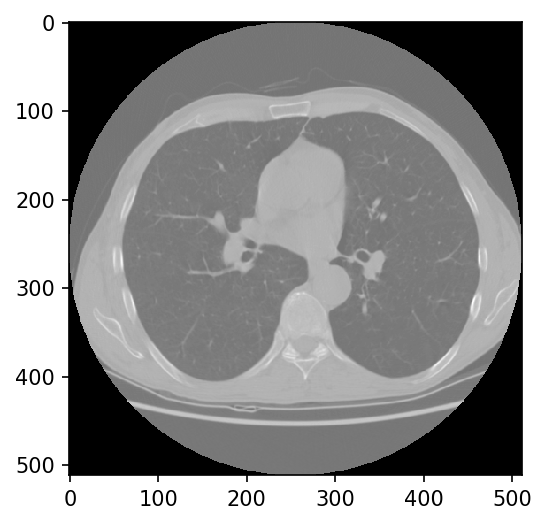

In [16]:
my_image = pydicom.read_file(lstFilesDCM[6]).pixel_array
pyplot.figure(dpi=150)
pyplot.imshow(my_image, cmap = 'gray')


In [94]:
pydicom.read_file(lstFilesDCM[66])

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.178847830789374716257481671950853399131
(0008, 0020) Study Date                          DA: '20010102'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession Number                    SH: '143604'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 0090) Referring Physician's Name          PN: ' '
(0008, 1010) Station Name                        SH: 'S04'
(0008, 1030) Study Description                   LO: 'NLST-LSS'
(0008, 103e) Series Description                  LO: '2,OPA,SE,SEN16,B50f,360,2,120,45,30,na'
(0008, 1090) Manufacturer's Model Name           LO: 'Sensation 16'
(0010, 0010) Patient's Name                      PN: '020669^LSS'
(0010

array([[851, 846, 837, ..., 831, 823, 821],
       [825, 828, 836, ..., 840, 842, 842],
       [826, 833, 845, ..., 842, 834, 831],
       ...,
       [574, 572, 569, ..., 576, 575, 575],
       [579, 580, 581, ..., 576, 577, 577],
       [566, 569, 573, ..., 578, 578, 579]], dtype=int16)

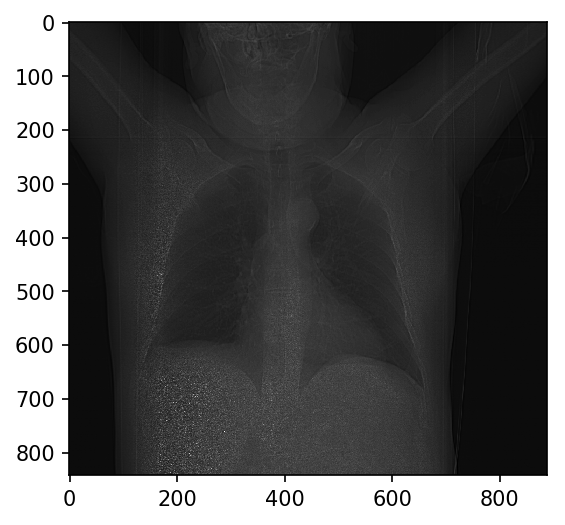

In [47]:
pyplot.figure(dpi=150)
pyplot.imshow(pydicom.read_file(testfile).pixel_array, cmap = 'gray')
pydicom.read_file(testfile).pixel_array

In [26]:
def img_resize(img,size):
    desired_size = size
    im = img
    old_size = im.shape[:2]
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT)
    return new_im

In [49]:
my_img = img_resize(pydicom.read_file(testfile).pixel_array,368)

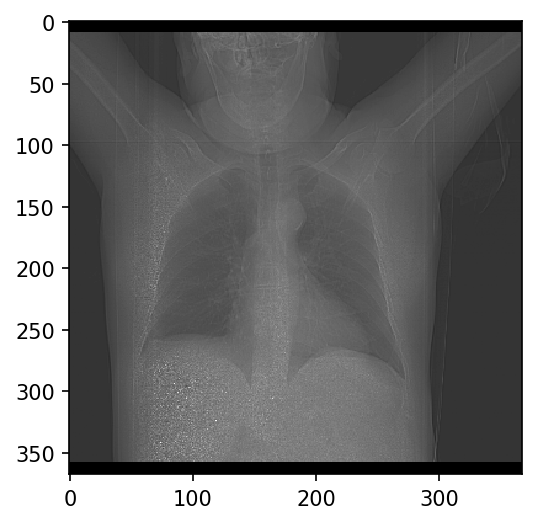

In [50]:
pyplot.figure(dpi=150)
pyplot.imshow(my_img, cmap = 'gray')

In [32]:
my_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)